In [1]:
import flax
import matplotlib.pyplot as plt

from model import HuBERTForTraining

In [2]:
checkpoint_path = "./checkpoints/hubert_bshall.bin"

In [3]:
with open(checkpoint_path, "rb") as f:
        jax_params = flax.serialization.from_bytes(HuBERTForTraining, f.read())
        print(f"JAX params loaded from {checkpoint_path}")

JAX params loaded from ./checkpoints/hubert_bshall.bin


In [4]:
def count_params(params):
    if isinstance(params, dict):
        return sum(count_params(sub_params) for sub_params in params.values())
    else:
        return params.size
    
total_params = count_params(jax_params)

print(f"Total number of parameters: {total_params}")

Total number of parameters: 94697600


In [5]:
def make_pie_chart(params):
    keys = []
    counts = []

    for key, value in params.items():
        count = count_params(value)
        print(key, count)
        keys.append(key)
        counts.append(count)

    # make pie chart
    plt.pie(counts)
    # put legend next to pie chart
    plt.legend(keys, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

feature_extractor 4200448
feature_projection 395008
positional_embedding 4719488
mask_embedding 768
norm 1536
proj 196864
label_embeddings 129024
encoder 85054464


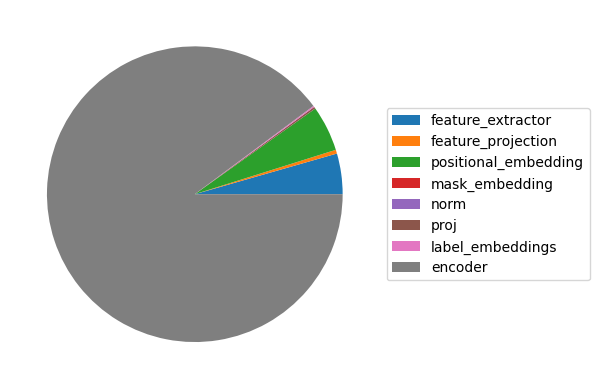

In [6]:
make_pie_chart(jax_params)

layers_0 7087872
layers_1 7087872
layers_2 7087872
layers_3 7087872
layers_4 7087872
layers_5 7087872
layers_6 7087872
layers_7 7087872
layers_8 7087872
layers_9 7087872
layers_10 7087872
layers_11 7087872


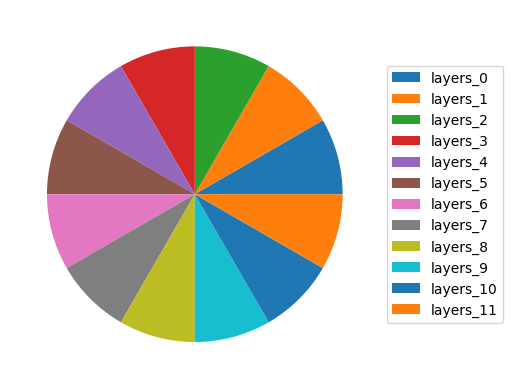

In [7]:
make_pie_chart(jax_params['encoder'])

self_attn 2362368
norm1 1536
norm2 1536
linear_0 2362368
linear_2 2360064


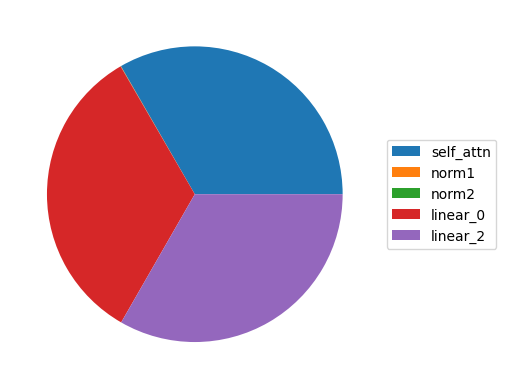

In [8]:
make_pie_chart(jax_params['encoder']['layers_0'])

qkv_proj 1771776
o_proj 590592


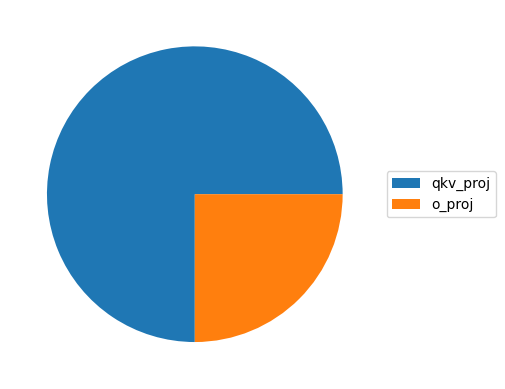

In [9]:
make_pie_chart(jax_params['encoder']['layers_0']['self_attn'])

In [10]:
self_attn_param_count = 0

for i in range(12):
    self_attn_param_count += count_params(jax_params['encoder'][f'layers_{i}']['self_attn'])

print(f"Total number of parameters in self-attention layers: {self_attn_param_count}")
print(f"Proportion of self-attention parameters to total parameters: {self_attn_param_count / total_params * 100:.2f}%")

Total number of parameters in self-attention layers: 28348416
Proportion of self-attention parameters to total parameters: 29.94%
